In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator.plot_resonator import amplitude
from kid_readout.analysis.timeseries import iqnoise

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-11-01_173822_sweep_stream_simultaneous/')

In [4]:
npd.node_names()

['SweepStreamArray0', 'ADCSnap1', 'SweepStreamArray2', 'ADCSnap3']

In [5]:
all_ssa = [npd.read(name) for name in npd.node_names() if name.startswith('SweepStreamArray')]

In [6]:
low_ssa = all_ssa[:1]
high_ssa = all_ssa[1:]

In [7]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [8]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(11.0, 10.0), (10.0, 10.0)]

for ssa in all_ssa:
    temperature.add_temperature(ssa, cryostat='hpd')

fig, ax = plt.subplots()
ax.plot([ssa.stream_array.epoch for ssa in all_ssa],
        [ssa.state.temperature.package for ssa in all_ssa],
        '.b')

df = pd.concat([sss.to_dataframe() for sss in all_sss])
np.save(npd.root_path.split('/')[-2] + '.npy', df.to_records())
df.shape

Qi: 21871; Qc: 1042048


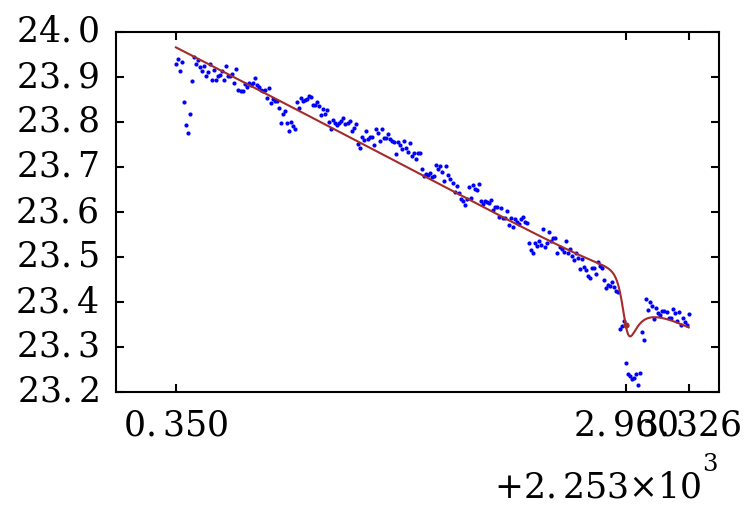

In [9]:
number = 0
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 327; Qc: 273


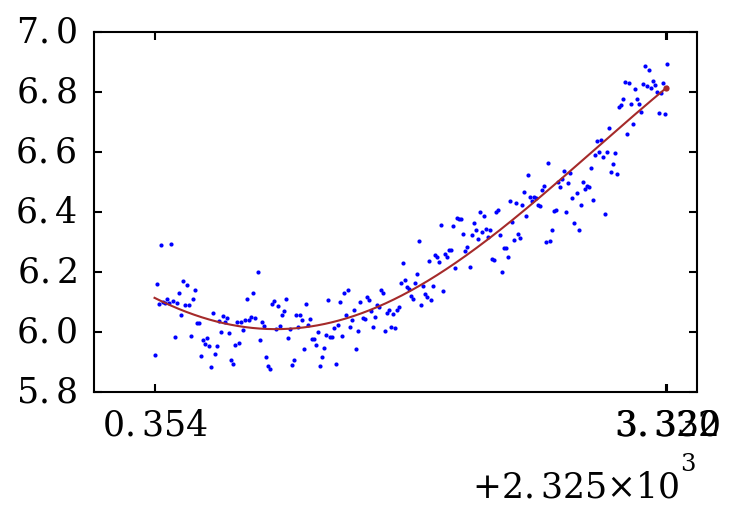

In [10]:
number = 1
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 1068; Qc: 89


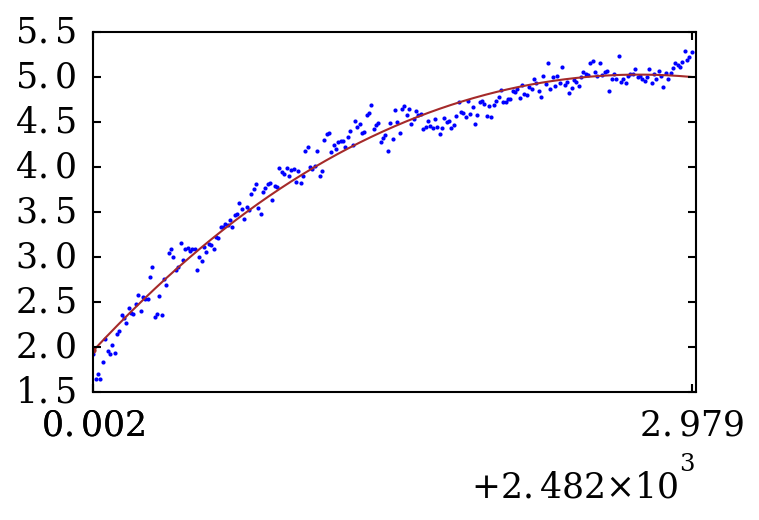

In [11]:
number = 2
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 707; Qc: 1


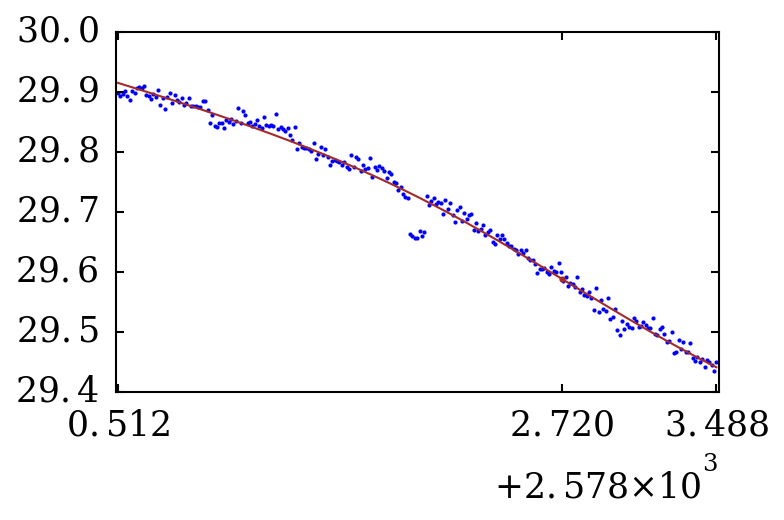

In [12]:
number = 3
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 38126; Qc: 5562328


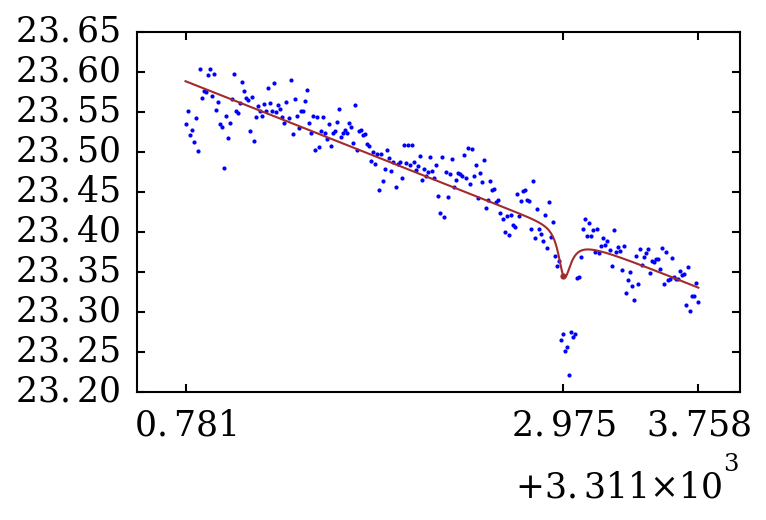

In [13]:
number = 0
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 444; Qc: 131


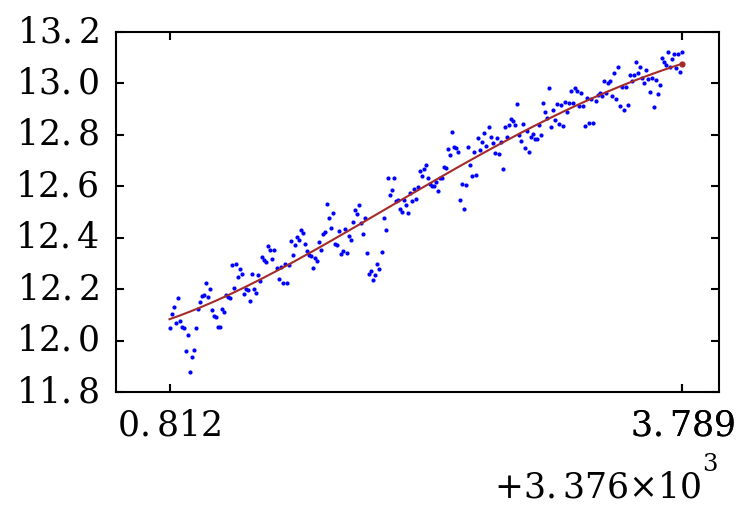

In [14]:
number = 1
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 956; Qc: 11


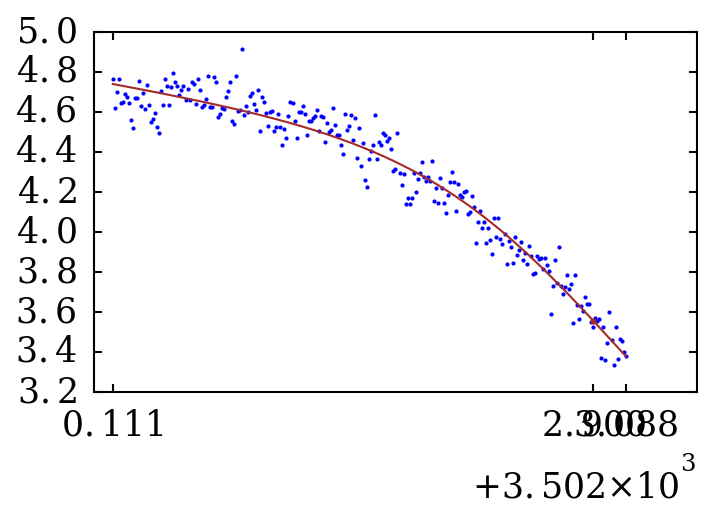

In [15]:
number = 2
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 354; Qc: 178


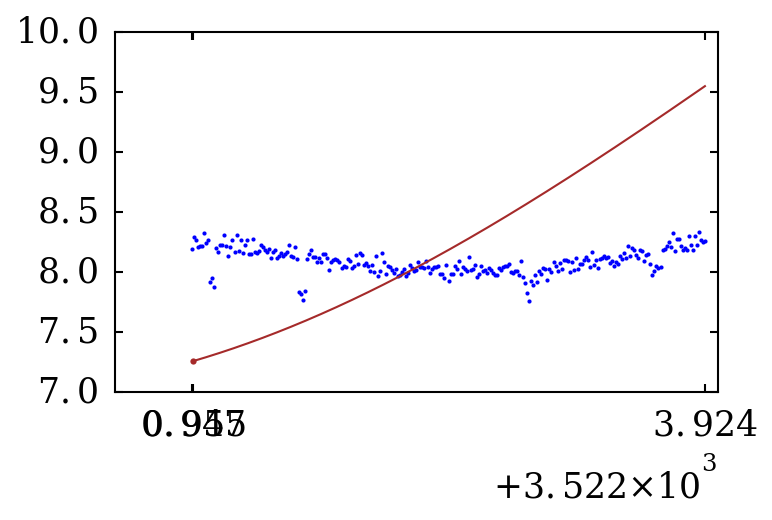

In [16]:
number = 3
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

In [17]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

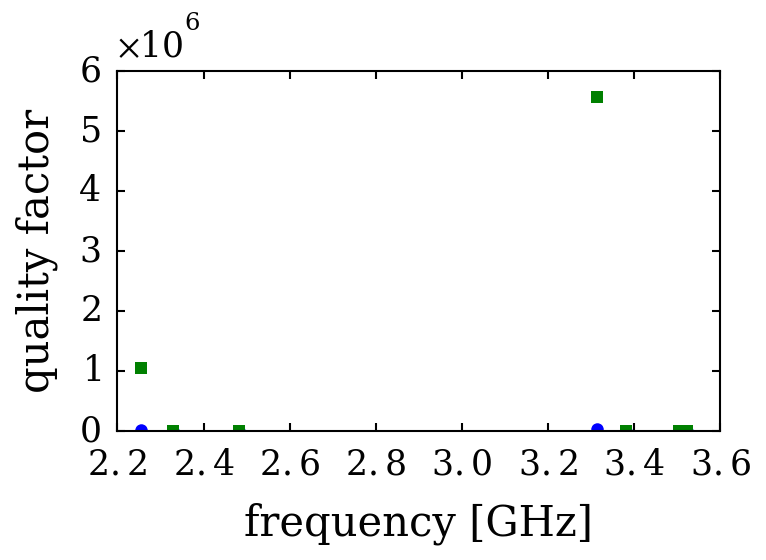

In [18]:
attenuation_index = 0
fig, ax = plt.subplots()
for lh_index, ssa in enumerate([low_ssa[attenuation_index], high_ssa[attenuation_index]]):
    for number in range(ssa.num_channels):
        if lh_index != 0 or number != 3:
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_i,
                    'o', color=Qi_color, label='$Q_i$')
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_e_real,
                    's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
#ax.legend(loc='upper center', numpoints=1)
#ax.set_xlim(1.9, 4.1)
#ax.set_ylim(0, 2e5)

In [19]:
colors = ['blue', 'green', 'red', 'gray', 'cyan', 'magenta', 'yellow', 'black']

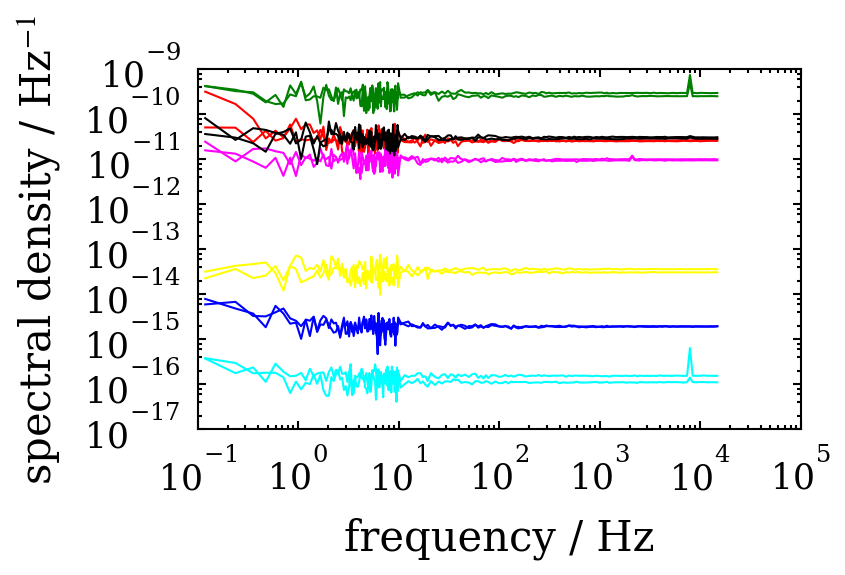

In [20]:
attenuation_index = 0

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')

for lh_index, ssa in enumerate([low_ssa[attenuation_index], high_ssa[attenuation_index]]):
    for number in range(ssa.num_channels):
        if lh_index != 0 or number != 3:
            ax.plot(ssa[number].S_frequency, ssa[number].S_xx,
                    color=colors[number + 4 * lh_index])
            ax.plot(ssa[number].S_frequency, ssa[number].S_yy,
                    color=colors[number + 4 * lh_index])